In [12]:
# Cell 1: Importing Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from utils import*

# Setting global styles for plots
plt.style.use('ggplot')

In [13]:
# Cell 2: Load and Display Dataset Information
# Define paths
root_dir = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/basic/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"

# List available files
image_files = sorted(os.listdir(image_dir))
gt_files = sorted(os.listdir(gt_dir))

# Display dataset stats
print(f"Number of Images: {len(image_files)}")
print(f"Image Dimensions: {mpimg.imread(image_dir + image_files[0]).shape}")
print(f"Ground Truth Dimensions: {mpimg.imread(gt_dir + gt_files[0]).shape}")

Number of Images: 100
Image Dimensions: (400, 400, 3)
Ground Truth Dimensions: (400, 400)


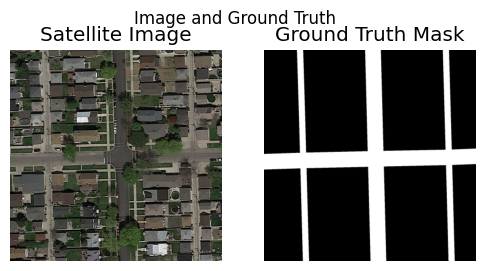

In [14]:
# Load one image and its mask
sample_img = load_image(image_dir + image_files[0])
sample_gt = load_image(gt_dir + gt_files[0])

# Display
display_image_pair(sample_img, sample_gt)

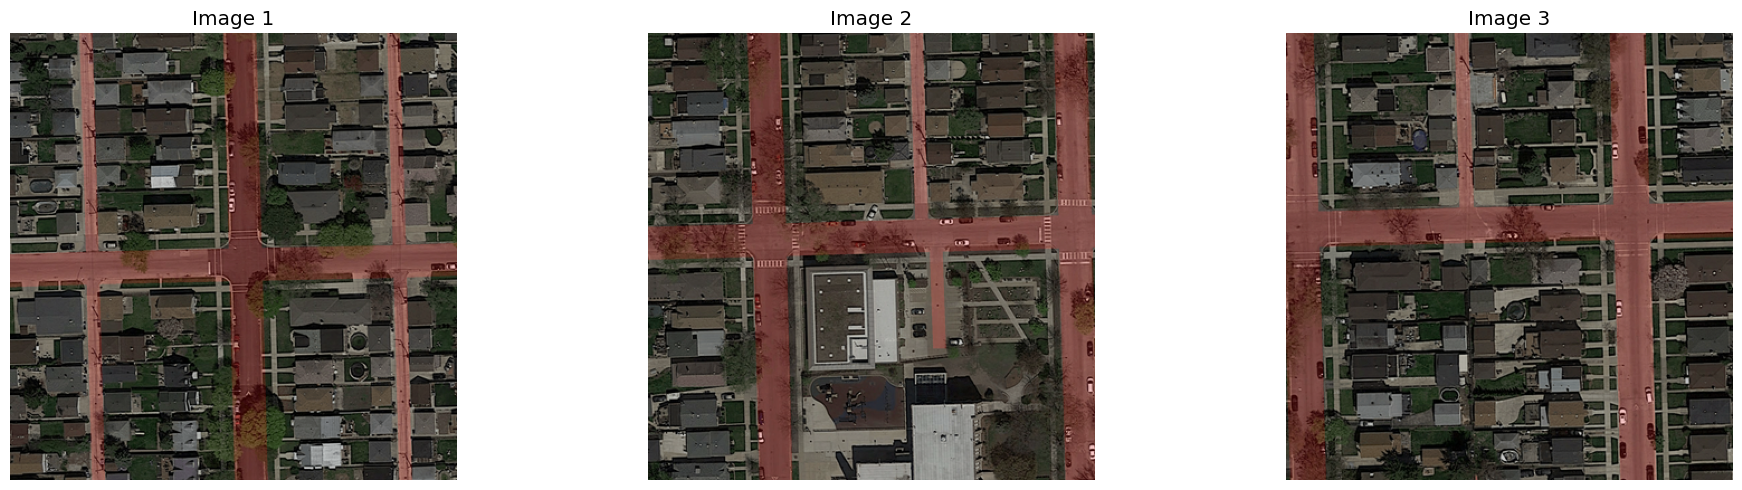

In [15]:
from PIL import Image

def img_float_to_uint8(img):
    """Convert float image to uint8."""
    rimg = img - np.min(img)
    return (rimg / np.max(rimg) * 255).round().astype(np.uint8)

def make_img_overlay(img, predicted_img):
    """Create an overlay of the image and the predicted mask."""
    w = img.shape[0]
    h = img.shape[1]
    color_mask = np.zeros((w, h, 3), dtype=np.uint8)
    color_mask[:, :, 0] = predicted_img * 255  # Red for the mask

    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, "RGB").convert("RGBA")
    overlay = Image.fromarray(color_mask, "RGB").convert("RGBA")
    new_img = Image.blend(background, overlay, 0.2)
    return new_img

# Verify correspondences between images and their masks
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

for i, ax in enumerate(axes):
    sample_img = load_image(image_dir + image_files[i])
    sample_gt = load_image(gt_dir + gt_files[i])

    # Generate an overlay
    overlay_img = make_img_overlay(sample_img, sample_gt)

    # Display each image
    ax.imshow(overlay_img)
    ax.set_title(f"Image {i+1}")
    ax.axis("off")  # Remove axes

plt.tight_layout()
plt.show()

0.18680807120513915
0.8131919287948608


/var/folders/s8/skzmxcdj7s762dxs0d27cc3h0000gn/T/ipykernel_14031/837467013.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Road", "Background"], y=[road_ratio, background_ratio], palette="coolwarm")


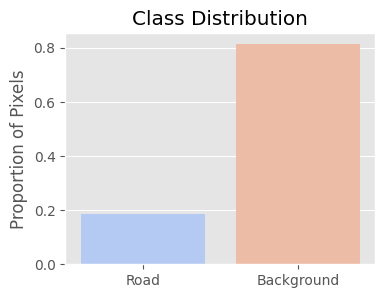

In [ ]:
# Compute road and background pixel counts
road_pixel_counts = [np.sum(load_image(gt_dir + f)) for f in gt_files]
total_pixels = np.prod(sample_gt.shape)

road_ratio = sum(road_pixel_counts) / (len(road_pixel_counts) * total_pixels)
background_ratio = 1 - road_ratio

print(road_ratio)
print(background_ratio)

# Plot class imbalance
plt.figure(figsize=(4, 3))
sns.barplot(x=["Road", "Background"], y=[road_ratio, background_ratio], palette="coolwarm")
plt.title("Class Distribution")
plt.ylabel("Proportion of Pixels")
plt.show()

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing subdirectories of test images
test_dir = "/Users/aurelien/ML/ML_course-main/projects/project2/data/test_set_images"

# Initialize lists to store information
image_dimensions = []
image_paths = []

# Traverse through subdirectories
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):  # Check if it's a directory
        for file in os.listdir(subdir_path):
            if file.endswith((".png", ".jpg", ".jpeg")):  # Filter image files
                image_path = os.path.join(subdir_path, file)
                image_paths.append(image_path)
                
                # Open the image to retrieve its dimensions
                with Image.open(image_path) as img:
                    image_dimensions.append(img.size)  # (width, height)

# Count total images
num_images = len(image_paths)

# Get unique dimensions
unique_dimensions = set(image_dimensions)

# Display results
print(f"Number of images: {num_images}")
print(f"Image dimensions: {unique_dimensions}")


Number of images: 50
Image dimensions: {(608, 608)}
